In [12]:
!pip install tensorflow-io[tensorflow]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.7/590.7 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 85.6 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.1
    Uninstalling tensorboard-2.17.1:
      Successfully uninstalled tensorboard-2.17.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.17.1
    Uninstalling tensorflow-2.17.1:
      Successfully uninstalled tensorflow-2.17.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.18.0 requires tensorflow<2.19,>=2.18, but you have tensorflow 2.16.2 which is incompatible.
tensorflow-text 2.18.1 requires tensorflow<2.19,>=2.18.0, but you have tensorflow 2.16.2 which is incompatible.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
import os
import cv2
import imghdr
from matplotlib import pyplot as plt

In [ ]:
# NEG = "/content/drive/MyDrive/Classroom/sickle/Negative/New_Clear"
# POS = "/content/drive/MyDrive/Classroom/sickle/Positive/Unlabelled"

data_dir = "/content/drive/MyDrive/sickle cell/data"

In [ ]:
os.listdir(os.path.join(data_dir))

['sickle cell', 'normal cell']

In [ ]:
img = cv2.imread(os.path.join(data_dir, 'sickle cell', '1.jpg' ))

In [ ]:
img.shape

(2853, 2775, 3)

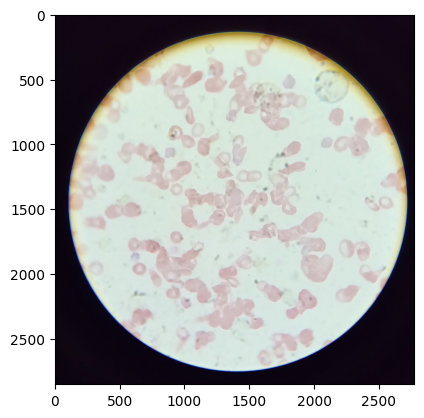

In [ ]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [ ]:
type(img)

numpy.ndarray

### **LOADING THE DATASET**

In [19]:
import tensorflow as tf
import tensorflow_io as tfio

AttributeError: module 'numpy' has no attribute 'dtypes'

In [13]:
import numpy as np

In [14]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

NameError: name 'tf' is not defined

In [ ]:
data_iterator = data.as_numpy_iterator()

In [ ]:
batch = data_iterator.next()

In [ ]:
batch[0].shape

(32, 256, 256, 3)

In [ ]:
batch[1]

array([0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1], dtype=int32)

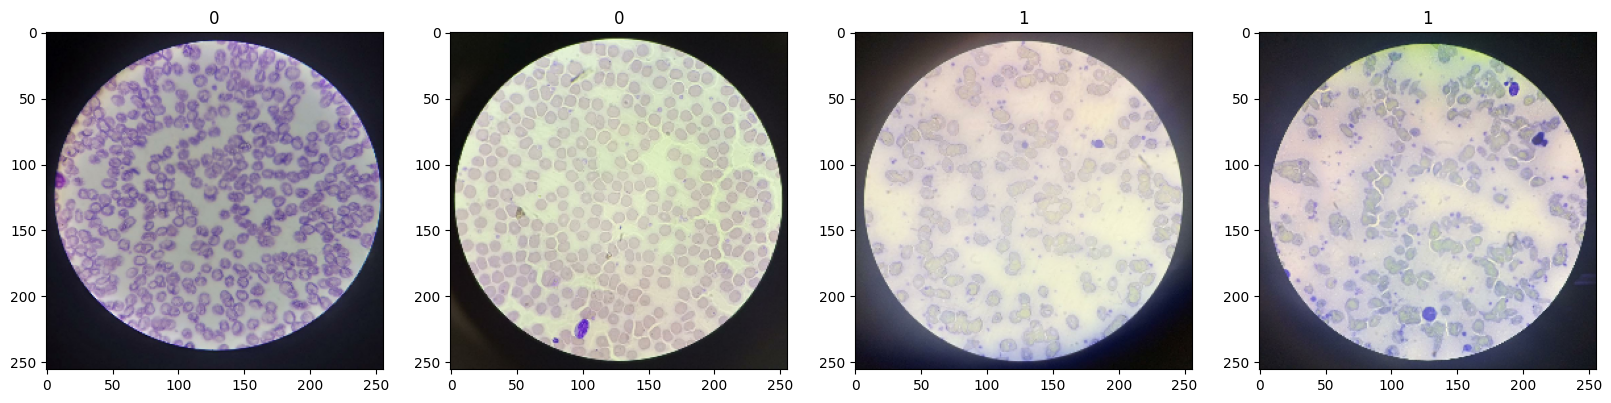

In [ ]:
#0 is normal cell
#1 is sickel cell
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

### **SCLAING**

In [ ]:
data = data.map(lambda x,y: (x/255, y))

In [ ]:
data.as_numpy_iterator().next()

(array([[[[0.09332084, 0.08939927, 0.11292868],
          [0.11533251, 0.11141094, 0.13494036],
          [0.08992154, 0.08599997, 0.10952938],
          ...,
          [0.08831069, 0.08831069, 0.09302644],
          [0.08952206, 0.08772978, 0.10094976],
          [0.09797698, 0.0961847 , 0.10940468]],
 
         [[0.10756884, 0.10364727, 0.12717669],
          [0.10219918, 0.09827761, 0.12180702],
          [0.10118767, 0.0972661 , 0.12079552],
          ...,
          [0.0898933 , 0.08778292, 0.10195719],
          [0.10543811, 0.10151654, 0.12257966],
          [0.08472876, 0.08080719, 0.10187031]],
 
         [[0.10094736, 0.09702579, 0.12055521],
          [0.10619687, 0.1022753 , 0.1258047 ],
          [0.12092525, 0.11700368, 0.14053309],
          ...,
          [0.0837929 , 0.07987133, 0.10563725],
          [0.09149458, 0.087573  , 0.11333893],
          [0.08953737, 0.08561581, 0.11138174]],
 
         ...,
 
         [[0.08581495, 0.08189338, 0.06620711],
          [0.06703

### **SPLITTING**

In [ ]:
len(data)

18

In [ ]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [ ]:
train_size + val_size + test_size

18

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [ ]:
print(len(train))
print(len(val))
len(test)

12
4


2

### **TRAIN**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [3]:
log_dir = "/kaggle/working/logs"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

NameError: name 'tf' is not defined

In [2]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

NameError: name 'tf' is not defined

In [ ]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
12/12 [==============================] - 61s 4s/step - loss: 1.3158 - accuracy: 0.7188 - val_loss: 0.5170 - val_accuracy: 0.7891
Epoch 2/20
12/12 [==============================] - 41s 3s/step - loss: 0.5793 - accuracy: 0.7344 - val_loss: 0.6078 - val_accuracy: 0.7422
Epoch 3/20
12/12 [==============================] - 50s 4s/step - loss: 0.6048 - accuracy: 0.7214 - val_loss: 0.5155 - val_accuracy: 0.7969
Epoch 4/20
12/12 [==============================] - 49s 4s/step - loss: 0.5739 - accuracy: 0.7370 - val_loss: 0.5995 - val_accuracy: 0.7109
Epoch 5/20
12/12 [==============================] - 50s 4s/step - loss: 0.5656 - accuracy: 0.7370 - val_loss: 0.5435 - val_accuracy: 0.7656
Epoch 6/20
12/12 [==============================] - 44s 3s/step - loss: 0.5546 - accuracy: 0.7422 - val_loss: 0.5458 - val_accuracy: 0.7422
Epoch 7/20
12/12 [==============================] - 51s 4s/step - loss: 0.5706 - accuracy: 0.7135 - val_loss: 0.5633 - val_accuracy: 0.7422
Epoch 8/20
12/12 [==

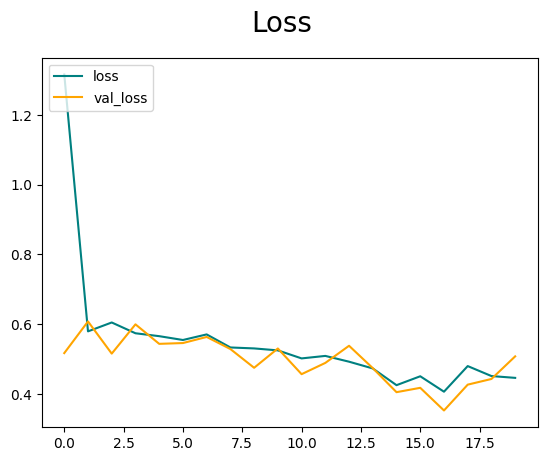

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

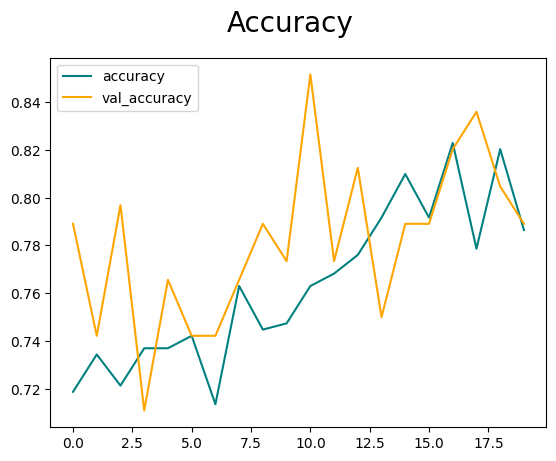

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

### **TEST**

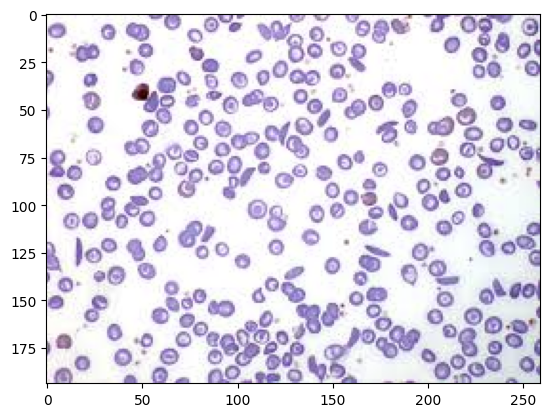

In [ ]:
img = cv2.imread('/content/drive/MyDrive/sickle cell/test image.jpg')
plt.imshow(img)
plt.show()

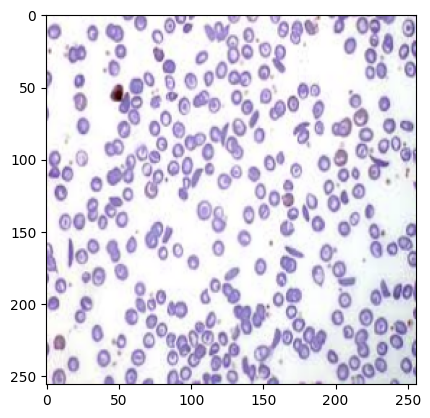

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 282ms/step


In [ ]:
yhat

array([[0.89233667]], dtype=float32)

In [ ]:
if yhat > 0.5:
    print(f'Predicted class is Sickle')
else:
    print(f'Predicted class is Not Sickle')

Predicted class is Sickle
